# KNN 연구과제 

## 문제 1

위스콘신 유방암 데이터셋과 타이타닉 탑승자 데이터 셋을 KNN 알고리즘으로 분류분석을 수행하고 로지스틱의 경우와 결과를 비교하시오.

각 데이터셋에 어떤 알고리즘을 적용하는 것이 더 좋은 성능을 기대할 수 있는지 결론을 내시오.

> 단, 전처리 과정은 이전 수업 내용과 동일하게 진행합니다.

# 위스콘신 유방암 데이터셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

### [2] 데이터 가져오기

In [17]:
origin = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  are

## #02. 데이터 전처리

### [1] 이전 예제에서 수립한 전처리 전략 재현

1. `0`값을 포함해서는 안되는 변수에 대해 평균으로 대체

#### (1) 스케일링

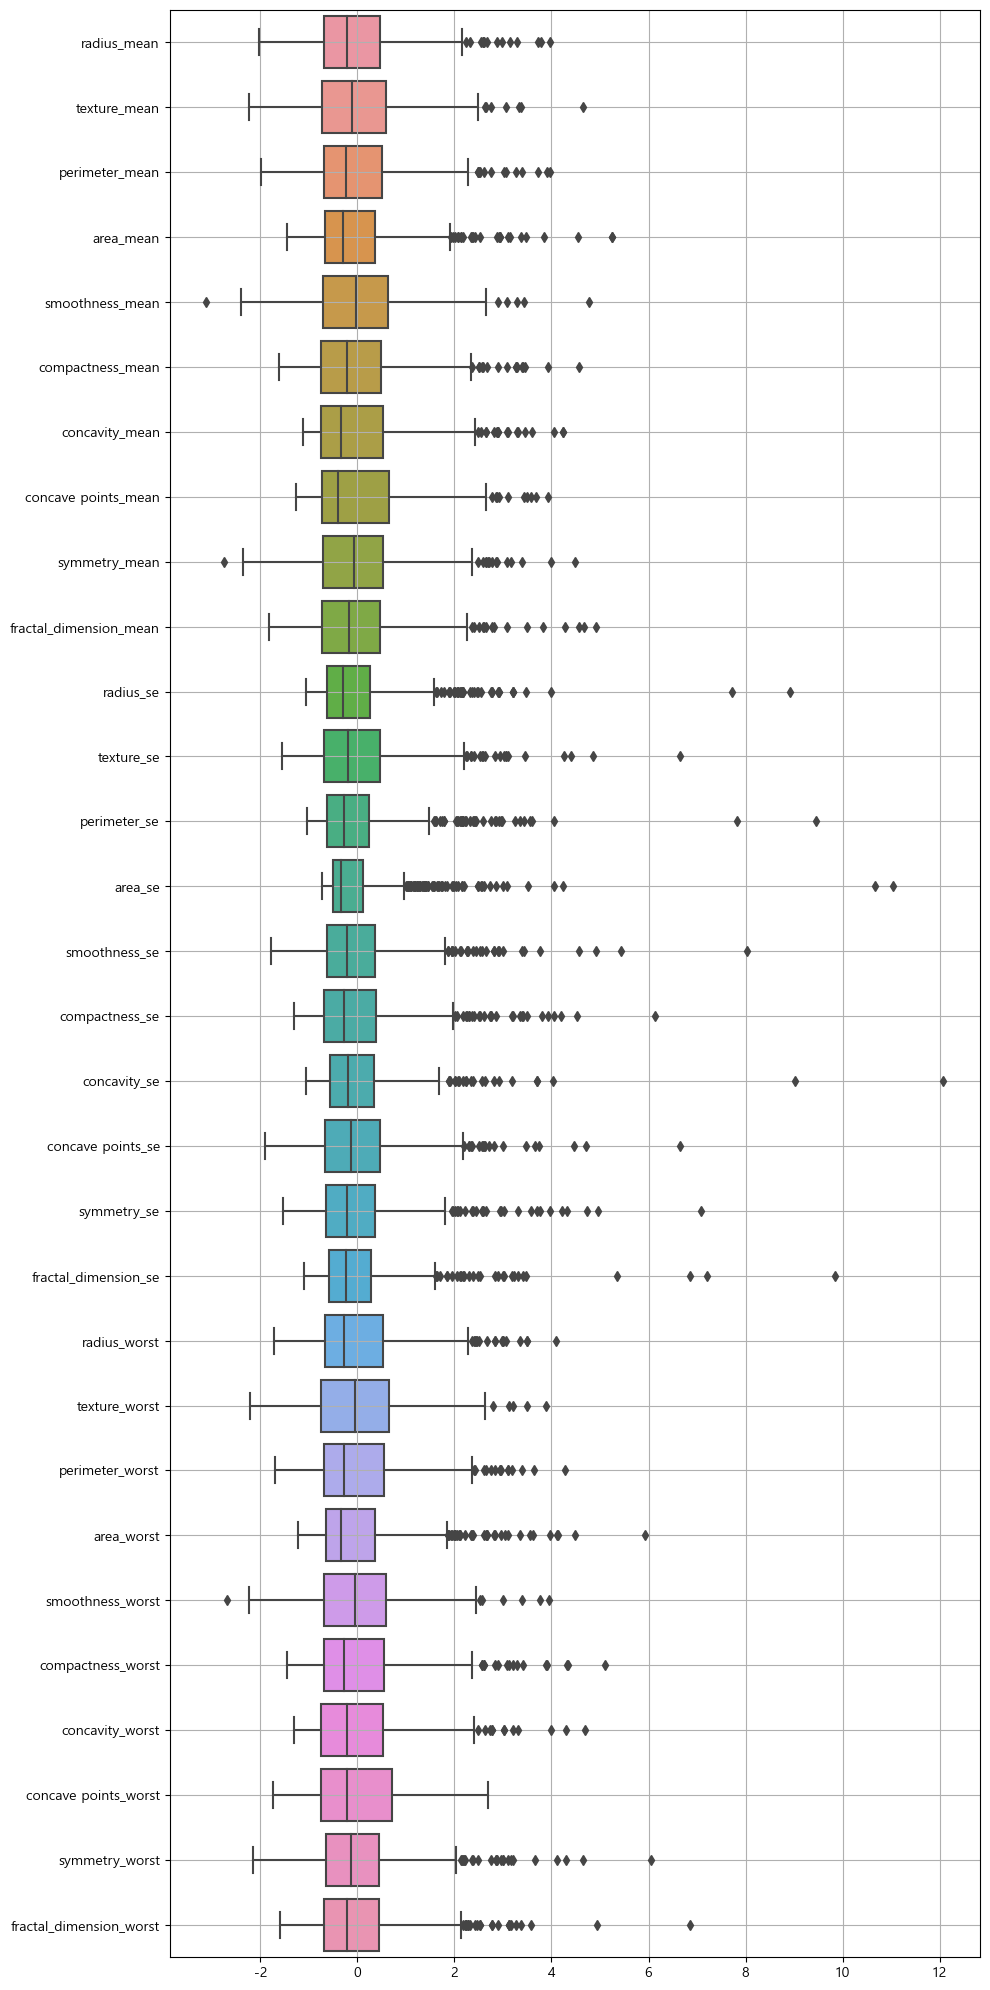

In [18]:
df = my_standard_scaler(origin, 'diagnosis')
my_boxplot(df, orient='h', figsize=(10, 20))

### [2] 종속변수 라벨링

`M`=악성=`1`, `B`=양성=`0`

In [20]:
df1 = my_labelling(df, 'diagnosis')
my_pretty_table(df1.head())

+----------+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-------------+
|       id |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |   radius_worst 

## #03. 모든 데이터를 활용한 기본 분석 모형 구현

### [1] 데이터 분할

In [23]:
df1['diagnosis'] = df1['diagnosis'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df1, yname = 'diagnosis', test_size = 0.2, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## #03. KNN 분류 적용

### [1] 분류 알고리즘 적용

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  6 | manhattan |             3 | uniform   |           0.96044 |
|  7 | manhattan |             3 | distance  |           0.96044 |
|  4 | euclidean |             7 | uniform   |          0.958242 |
|  0 | euclidean |             3 | uniform   |          0.956044 |
|  1 | euclidean |             3 | distance  |          0.956044 |
|  5 | euclidean |             7 | distance  |          0.956044 |
|  2 | euclidean |             5 | uniform   |          0.953846 |
|  3 | euclidean |             5 | distance  |          0.953846 |
| 10 | manhattan |             7 | uniform   |          0.953846 |
| 11 | manhattan |             7 | distance  |          0.953846 |
|  8 | manhattan |             5 | uniform   |          0.951648 |
|  9 | manhattan |             5 | distance  |         

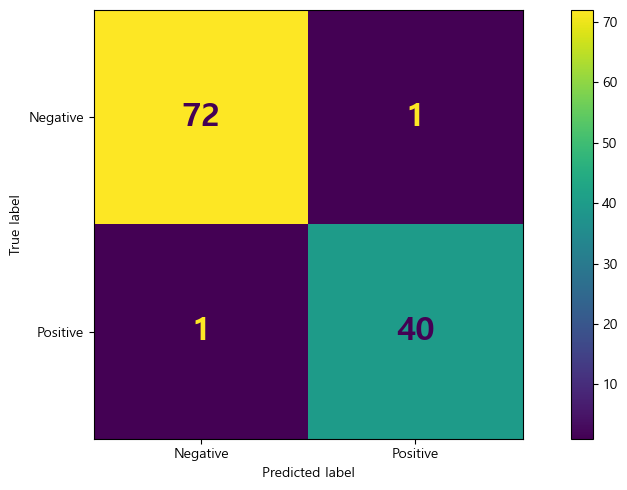

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


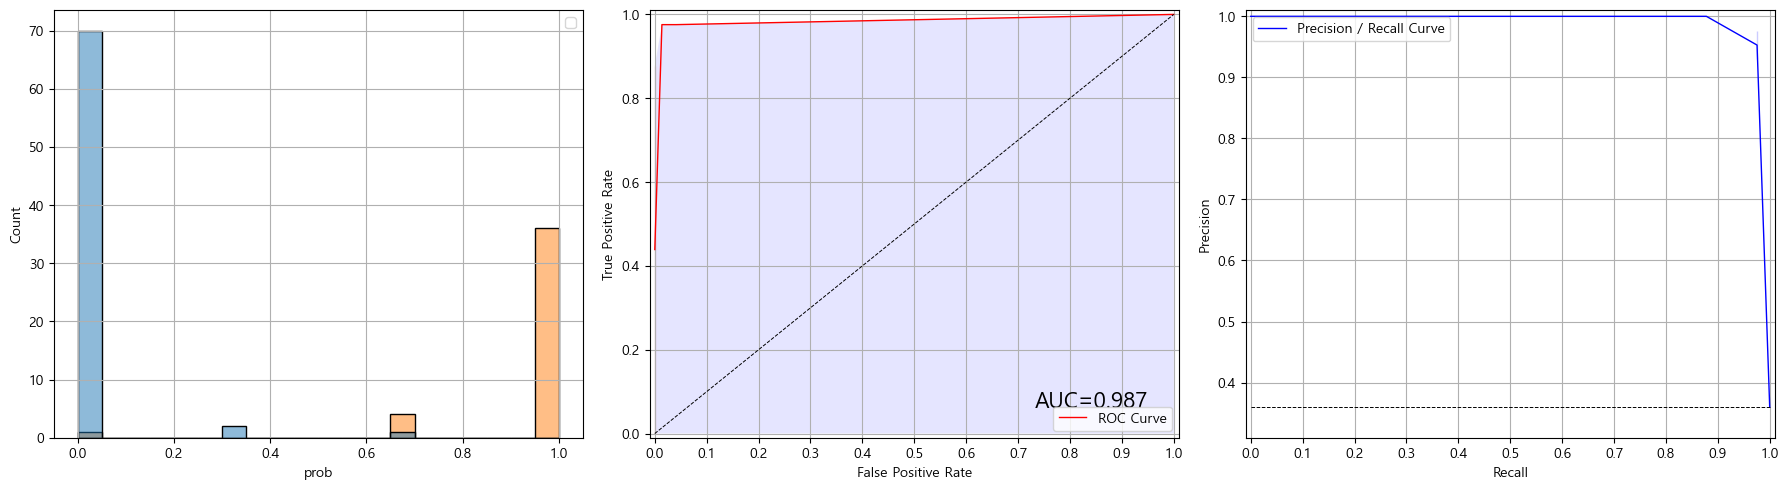


[학습곡선]


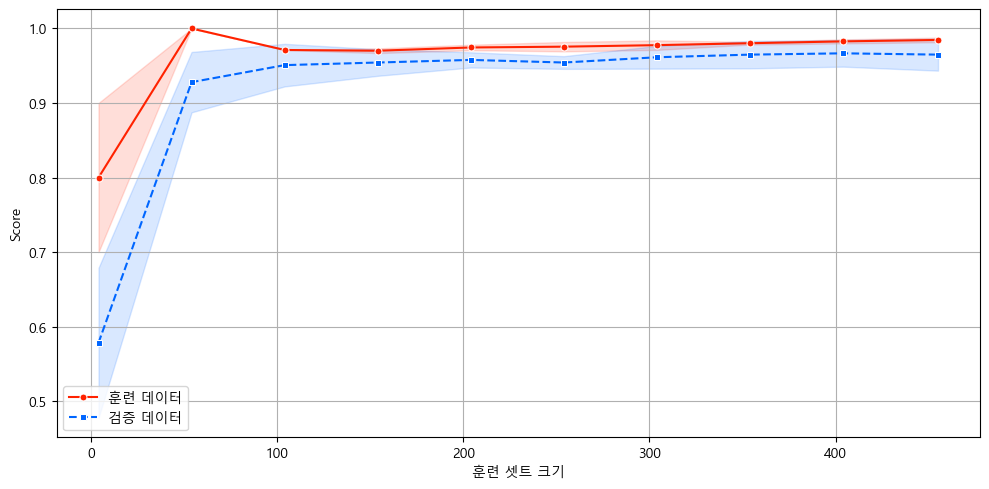

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)

In [24]:
my_knn_classification(x_train, y_train, x_test, y_test)

## #04. 로지스틱회귀 분류 적용

### [1]  로지스틱 회귀 모형

In [25]:
model = LogisticRegression()
model.fit(x_train, y_train)
print("훈련데이터 점수: ", model.score(x_train, y_train))
print("검증데이터 점수: ", model.score(x_test, y_test))

훈련데이터 점수:  0.9868131868131869
검증데이터 점수:  0.9912280701754386


[교차검증]
+----+-------+------------+-----------+-------------------+
|    |     C |   max_iter | penalty   |   mean_test_score |
|----+-------+------------+-----------+-------------------|
|  7 |   0.1 |        500 | l2        |          0.978022 |
| 10 |     1 |        500 | l2        |          0.978022 |
| 13 |    10 |        500 | l2        |          0.971429 |
| 16 |   100 |        500 | l2        |          0.967033 |
|  4 |  0.01 |        500 | l2        |          0.945055 |
|  1 | 0.001 |        500 | l2        |          0.883516 |
+----+-------+------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.869719 |  

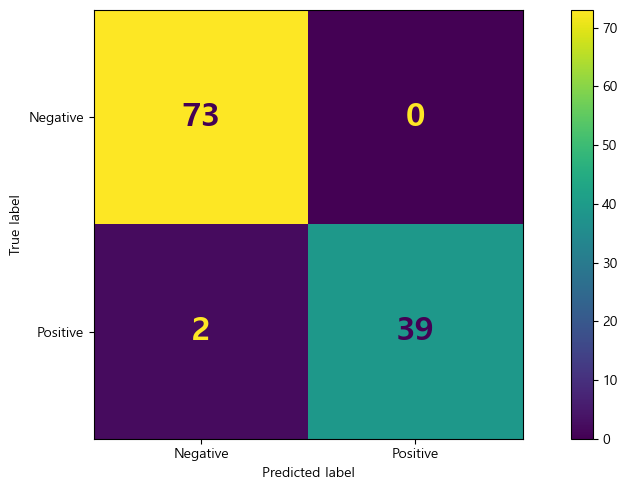

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


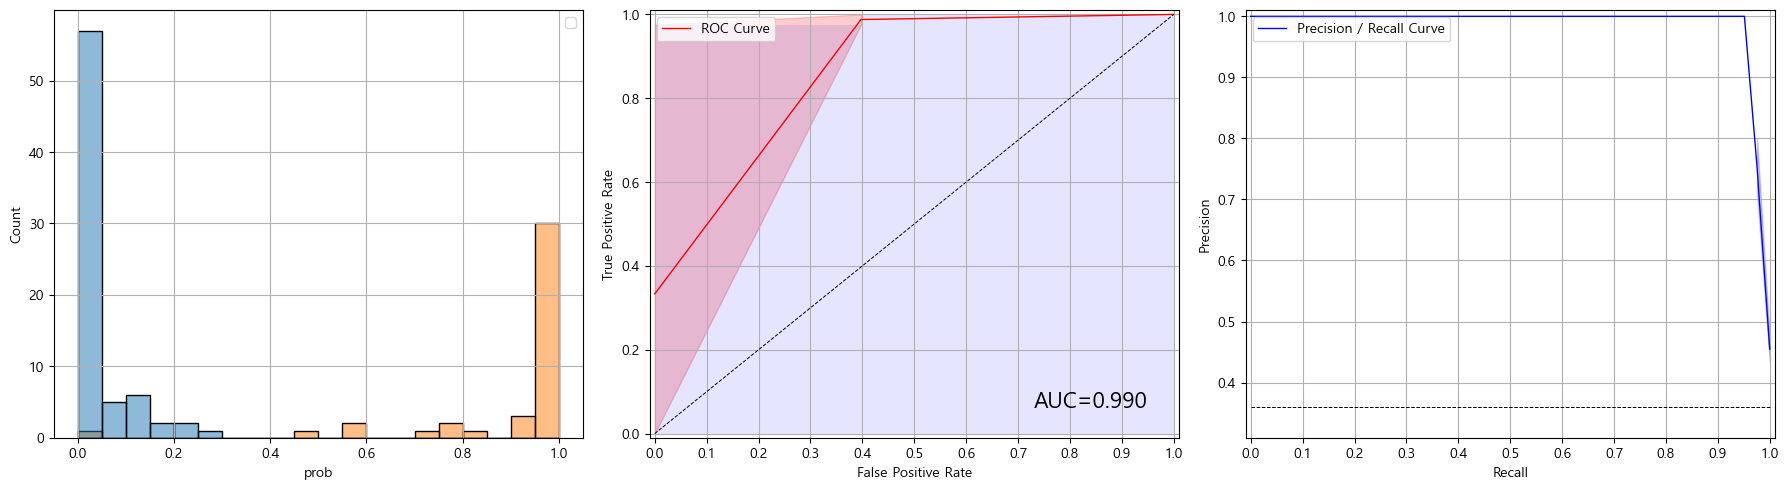


[학습곡선]


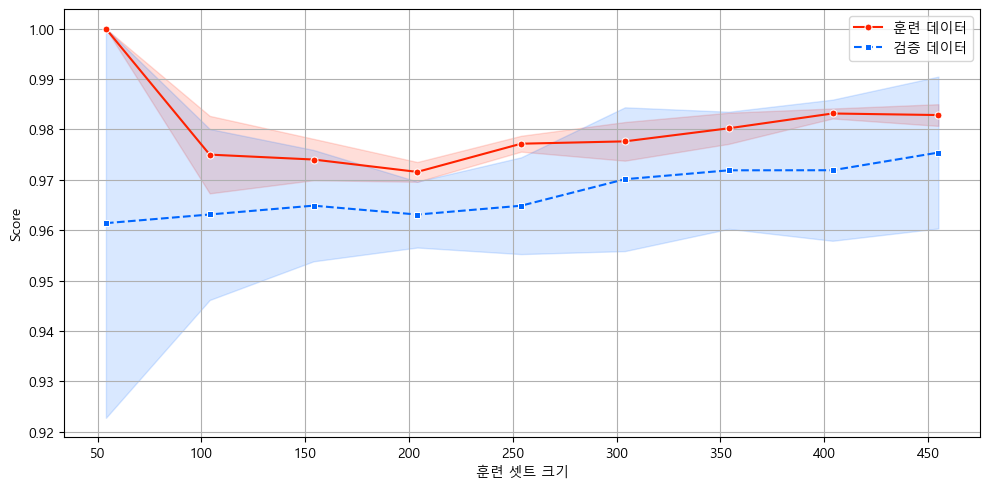

+----+------------+-------------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수                |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+-------------------------+--------------------+------------+---------+------------+---------+------------|
|  0 | diagnosis  | radius_mean             |             0.3976 |     74.092 |  0.0054 |      0.996 | 7154.91 |     1.4883 |
|  1 | diagnosis  | texture_mean            |             0.4098 |      3.177 |   0.129 |      0.897 | 10.9017 |     1.5066 |
|  2 | diagnosis  | perimeter_mean          |             0.3861 |     73.769 |  0.0052 |      0.996 | 8652.28 |     1.4712 |
|  3 | diagnosis  | area_mean               |             0.3794 |      29.39 |  0.0129 |       0.99 | 710.047 |     1.4614 |
|  4 | diagnosis  | smoothness_mean         |             0.1662 |      3.064 |  0.0542 |      0.957 | 13.9662 |     1.1808 |
|  5 | diagnos

In [26]:
estimator = my_logistic_classification(x_train, y_train, x_test, y_test)

# 타이타닉 탑승자 데이터 셋

## #01. 준비작업

### [1] 데이터 가져오기

In [27]:
origin = my_read_excel("https://data.hossam.kr/edadata/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'], info=False)

### [2] 원본 데이터 프레임 복사

데이터 전처리를 하는 동안 원본을 보관할 목적

In [28]:
df = origin.copy()

## #02. 데이터 전처리

### [1] 나이

탐색적 데이터 분석 과정에서 나이가 생존 여부에 유의미한 차이를 보이는 것으로 판단되었으므로 나이에 대한 결측치를 무조건적인 평균보다 생존자의 평균나이와 사망자의 평균 나이로 나누어서 처리하는 것이 좋을 것이다.

#### (1) 생존자 평균 나이

In [29]:
mean_age_df = df[['Survived','Age']].groupby('Survived').mean()
mean_age_df

,Age
Survived,
0,30.510986
1,28.931079


#### (2) 사망자 평균 나이

In [30]:
for i in mean_age_df.index:
    mean_age = round(mean_age_df.loc[i]['Age'], 0)
    #print(mean_age)

    expr = (df['Survived'] == i) & (df['Age'].isna())
    df.loc[expr, 'Age'] = df.loc[expr, 'Age'].fillna(mean_age)

df['Age'].isna().sum()

0

#### (3) 결측치 정제 후 데이터 분포 확인

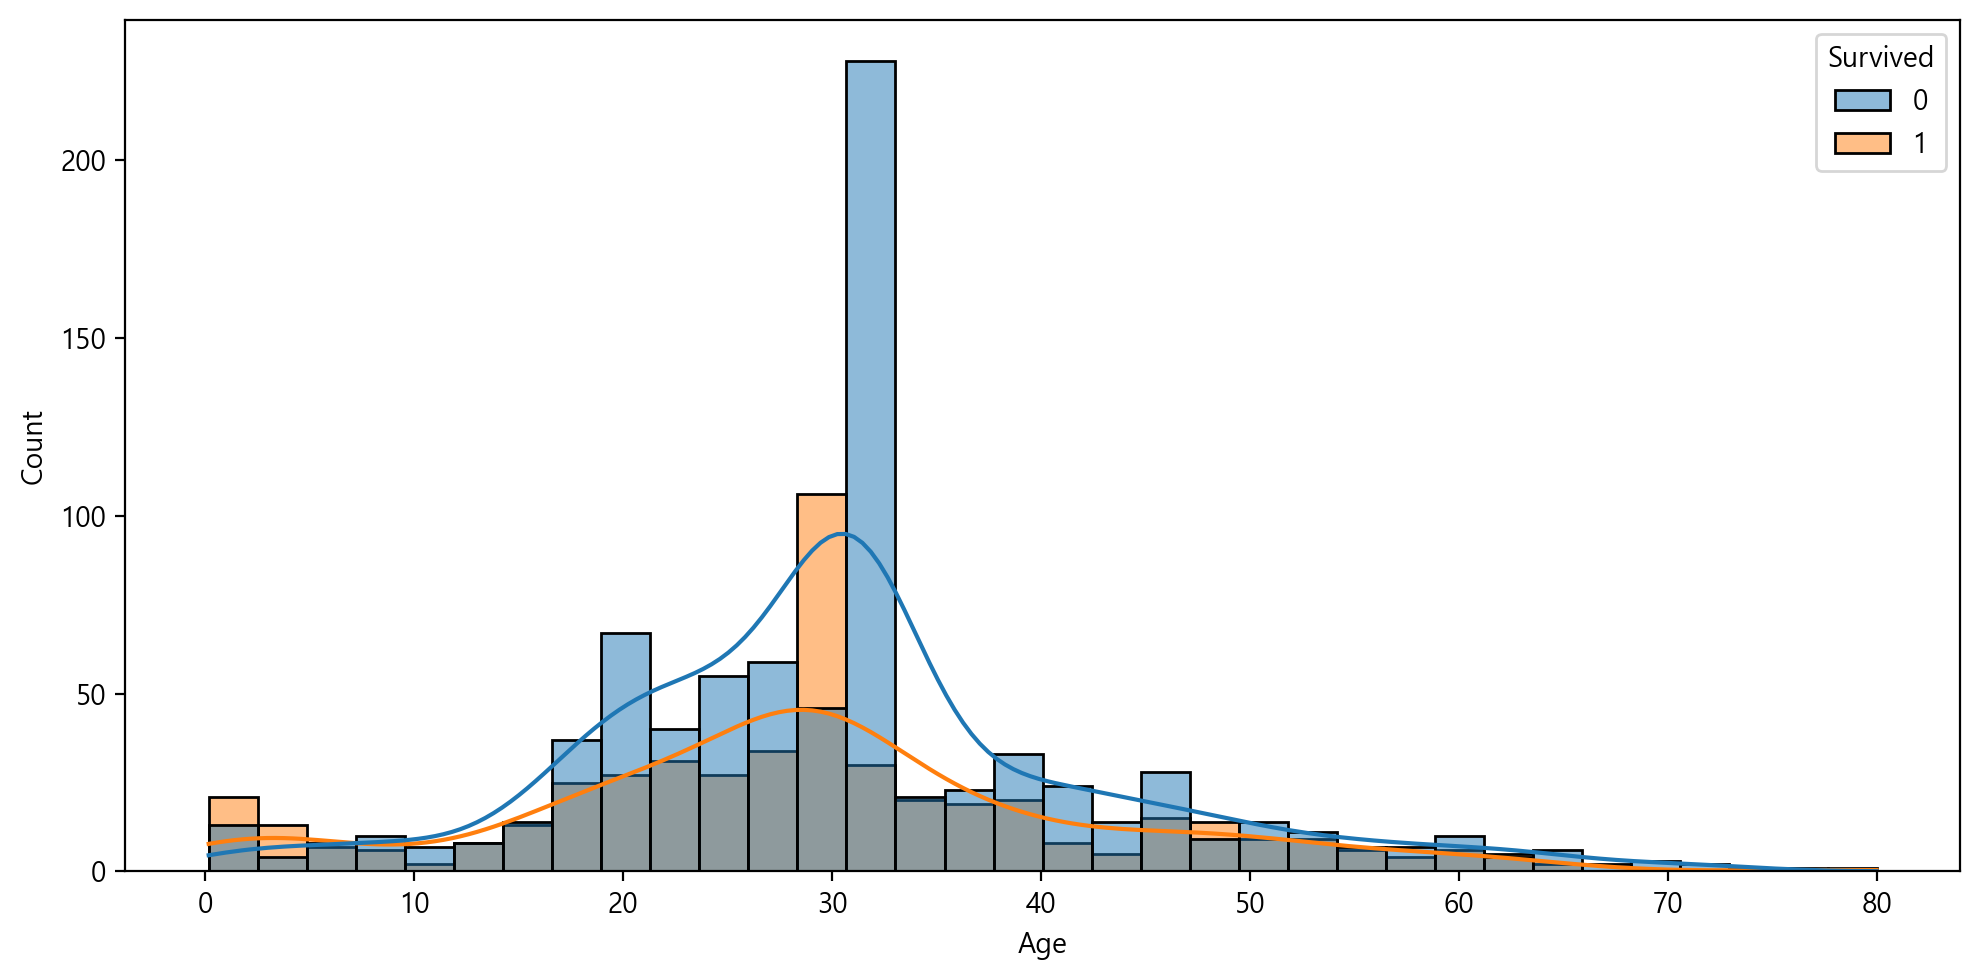

In [31]:
my_histplot(df, 'Age', hue='Survived', dpi=200)

> 분명 생존 여부에 유의미한 차이를 보이는 구간이 있지만, 아직 구간이 너무 많다.

#### (4) 나이의 구간 수를 변경

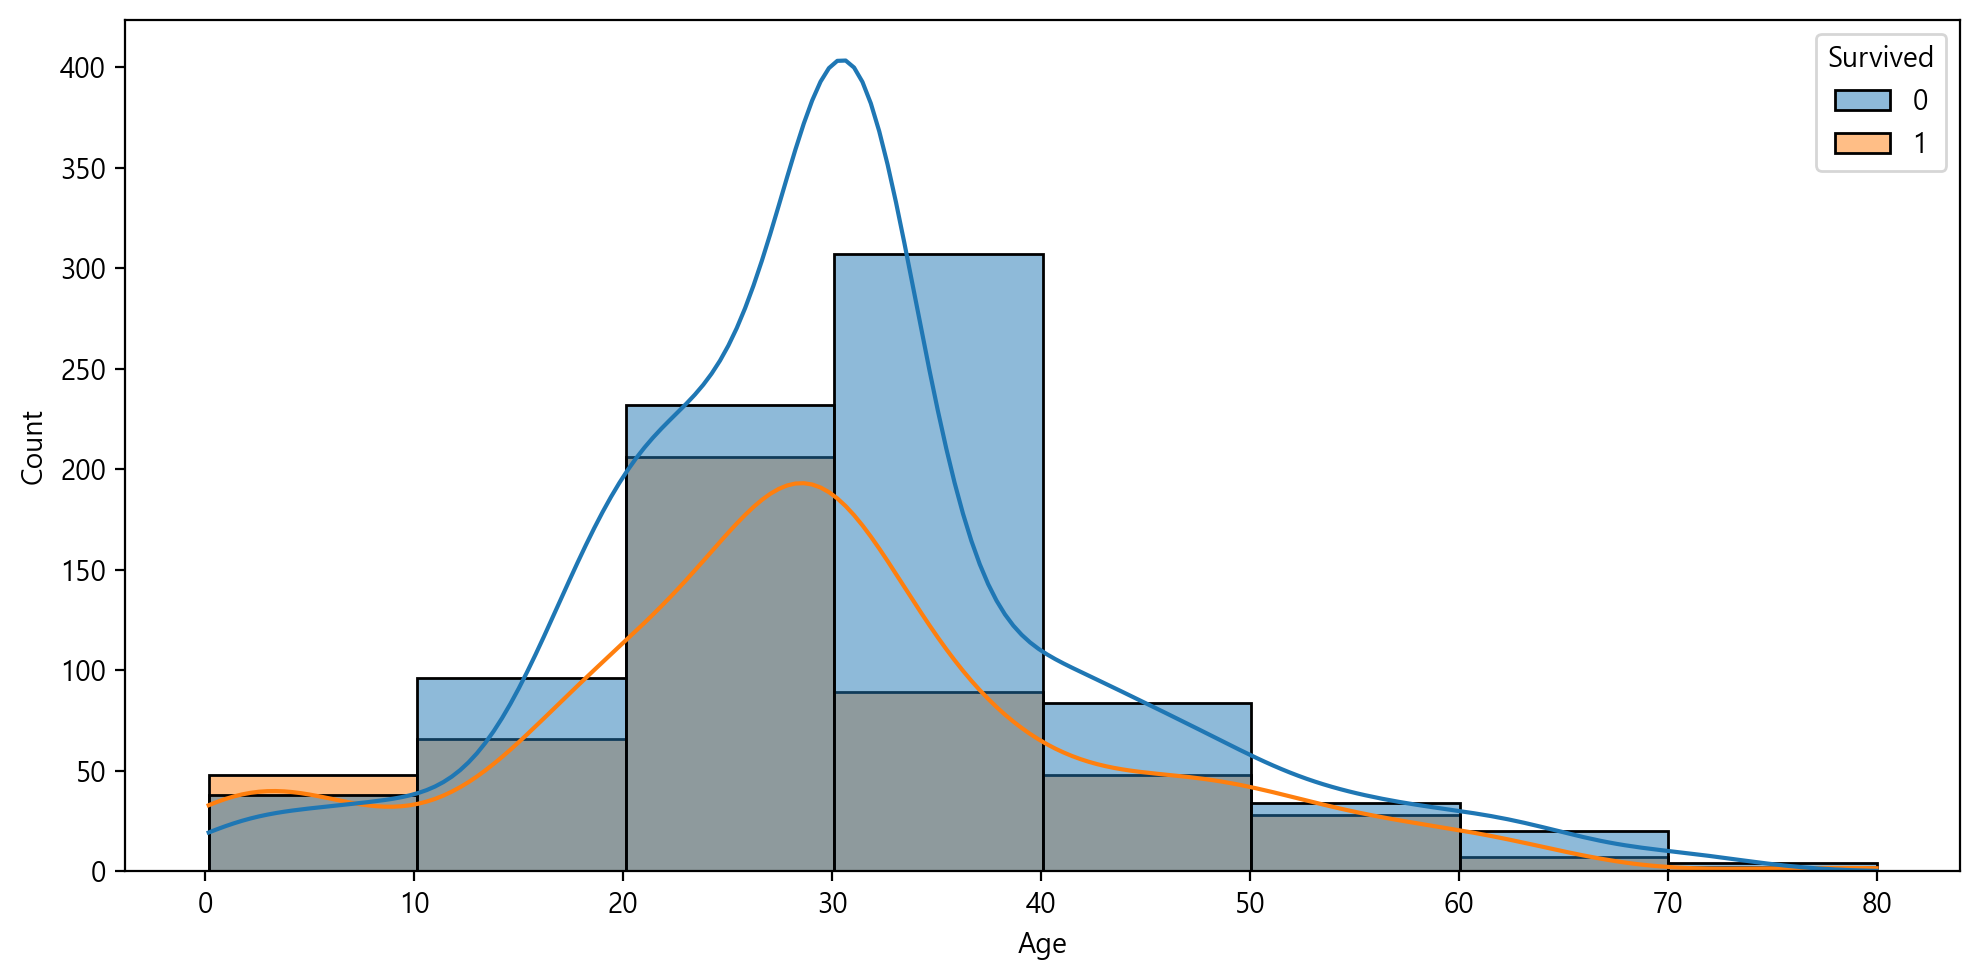

In [32]:
my_histplot(df, 'Age', hue='Survived', bins=8, dpi=200)

> 5개 구간부터 구간 수를 늘려가면서 히스토그램을 확인해 본 결과 5개 구간 이후에 생존자 수가 사망자 수보다 더 많은 구간이 유의미하게 늘어나지 않았다.
>
> 그러므로 5개를 넘는 구간수는 큰 의미가 없는 것으로 보고 나이의 구간을 5개 등급으로 나누기로 결정

#### (5) 나이의 구간에 따른 기준 값 구하기

In [33]:
hist, bins = np.histogram(df['Age'], bins=5)
print(hist)
print(np.round(bins, 0))

[134 787 269 106  13]
[ 0. 16. 32. 48. 64. 80.]


> 16세 이하, 17~32세, 33~48세, 49~64세, 64세 초과 구간으로 나누어 라벨링을 수행

In [34]:
df2 = df.copy()
df2.loc[ df2['Age'] <= 16, "Age"] = 0
df2.loc[ (df2['Age'] > 16) & (df2['Age'] <= 32), "Age"] = 1
df2.loc[ (df2['Age'] > 32) & (df2['Age'] <= 48), "Age"] = 2
df2.loc[ (df2['Age'] > 48) & (df2['Age'] <= 64), "Age"] = 3
df2.loc[ df2['Age'] > 64, "Age"] = 4

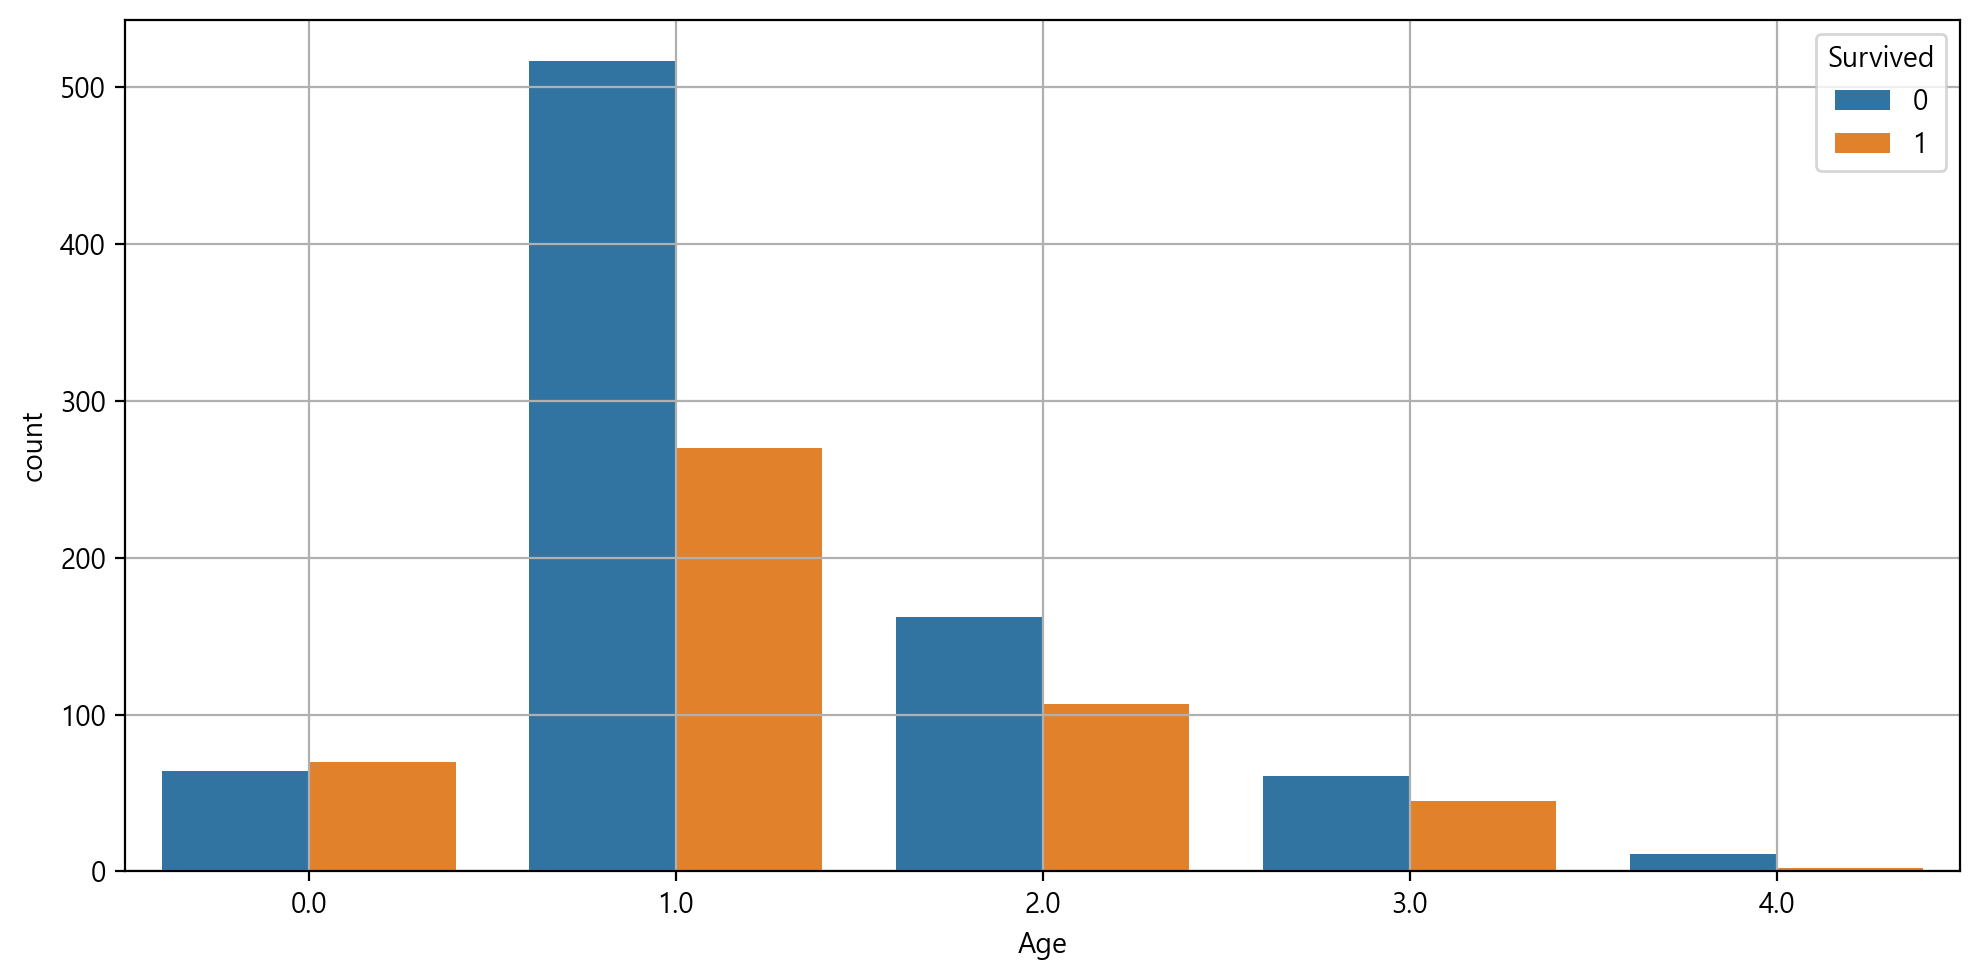

In [35]:
my_countplot(df2, xname='Age', hue='Survived', dpi=200)

> 라벨링 된 나이가 `0`인 구간은 생존자 수가 사망자 수보다 많고, 그 이외의 구간은 사망자 수가 생존자 보다 많다.

### [2] 객실 유무

앞 분석에서는 객실번호 데이터를 제외하고 분석모형을 생성했으나 단순히 객실의 유무만로 명목형 변수를 생성하여 분석에 포함함

#### (1) 명목형 변수 생성

#### (2) 객실 유무에 따른 생존 비율 비교

### [3] 가족 구성원 수

형제자매/배우자 + 부모/자녀 + 본인

### [4] 혼자 탑승했는지 여부

### [5] 탑승지 데이터의 결측치 처리

#### (1) 생존, 사망 여부에 따른 최빈값 구하기

#### (2) 탑승지 결측치에 대한 종속변수를 확인하고 적절한 값으로 대체

### [6] 운임요금에 대한 결측치 처리

#### (1) 결측치 확인

#### (2) 생존, 사망 여부에 따라 평균값 구함

#### (3) 생존 여부에 따른 평균 요금 대체

### [7] 이름에 대한 처리

#### (1) 정규표현식 처리 함수

이름에서 알파벳을 제외한 나머지 글자를 제외하고 어절단위로 리스트로 묶은 후 인덱스가 1인 위치를 리턴하는 함수

> 예) Mr. Lee --> ['Mr', 'Lee']

#### (2) 이름 앞에 붙은 호칭을 분리

#### (3) 희귀 호칭은 `기타등등`으로 분류함

### [8] 라벨링

### [9] 운임요금에 대한 처리

#### (1) 사분위수 확인

#### (2) 사분위수 구간에 따라 라벨링

### [10] 불필요한 컬럼 제거

### [11] 훈련/검증 데이터 분리

## #03. KNN 분류 분석

## #04. 로지스틱 회귀 분석